# Plotting Effect Medication on Infection Time Course

In [1]:
import sys
sys.path.append('../datasets') 
import dataset_long as dsl

sys.path.append('../fitting') 
import paramfitt_singlePatient as pf 

# Model
import numpy as np
import tellurium as te
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Dataframe
import pandas as pd

#Estimation

from scipy.optimize import minimize 
from collections import OrderedDict
from scipy.stats import qmc
from scipy.optimize import basinhopping
#Analyse Estimation
from scipy.stats import chi2
from scipy.stats import norm

# Save optimization params
import json
import time

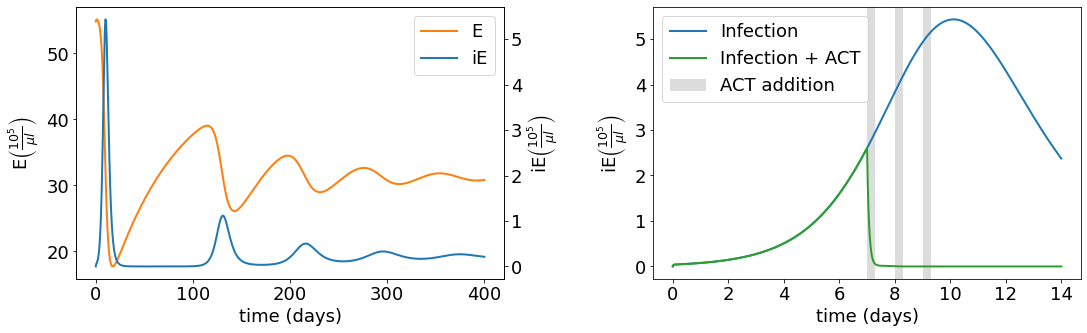

In [26]:
# Laden des Modells
OIE = te.loada('.././model/OIE_model.ant')

#Simulation
time_max_1 = 400
step_size_1 = 1000 + 1
time_max2 = 14
step_size2 = 100000 + 1
size_of_font = 18
legend_size = 11


variables = ['E', 'iE', 'ART']
OIE.events_medication_on = False
OIE.BH_max = 0
OIE.BH_max = 0
result = OIE.simulate(0, time_max_1, step_size_1, ['time'] + variables)

# Erstellen der Subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
fig.subplots_adjust(wspace= 0.35)

# Erster Plot
ax1.plot(result['time'], result[variables[0]]/100000, label='E', color= 'tab:orange',  linewidth=2)
ax1.tick_params(labelsize=size_of_font) # Größe Achseneinteilungen (zahlen)
ax1.set_xlabel('time (days)',fontsize = size_of_font )
ax1.set_ylabel(variables[0]+r'$\left( \frac{ 10^5}{\mu l} \right)$', fontsize = size_of_font )
#ax1.set_ylim(0, 5e6)
#ax1.legend(fontsize = legend_size, loc='upper left')
ax12 = ax1.twinx()
ax12.plot(result['time'], result[variables[1]]/100000, label=variables[1], color='tab:blue',  linewidth=2)
ax12.tick_params(labelsize=size_of_font) # Größe Achseneinteilungen (zahlen)
ax12.set_ylabel(variables[1]+r'$\left( \frac{ 10^5}{\mu l} \right)$', fontsize=size_of_font)
#ax12.legend(loc='upper right',fontsize=legend_size)
# Handhabungen und Beschriftungen aus beiden Achsen abrufen
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax12.get_legend_handles_labels()
# Handhabungen und Beschriftungen zusammenführen
handles = handles1 + handles2
labels = labels1 + labels2
# Eine einzige Legende mit den zusammengeführten Handhabungen und Beschriftungen erstellen
ax1.legend(handles, labels, loc='upper right', fontsize=size_of_font)


OIE.resetToOrigin()
OIE.events_medication_on = False
result1 = OIE.simulate(0, time_max2, step_size2, ['time', 'iE'])
OIE.resetToOrigin()
OIE.BH_max = 0
result2 = OIE.simulate(0, time_max2, step_size2, ['time', 'iE'])

ax2.plot(result1['time'], result1['iE']/100000, label='Infection', color = 'tab:blue',  linewidth=2)
ax2.plot(result2['time'], result2['iE']/100000, label='Infection + ACT', color='tab:green', linewidth=2)
ax2.axvspan(7, 7.3, facecolor='gainsboro', alpha=1, label='ACT addition')
ax2.axvspan(8, 8.3, facecolor='gainsboro', alpha=1)
ax2.axvspan(9, 9.3, facecolor='gainsboro', alpha=1)

ax2.tick_params(labelsize=size_of_font) # Größe Achseneinteilungen (zahlen)
ax2.set_xticks(range(0, time_max2 + 1, 2))
ax2.set_xlabel('time (days)', fontsize= size_of_font)
ax2.set_ylabel('iE' +r'$ \left( \frac{ 10^5}{\mu l} \right)$', fontsize= size_of_font)
ax2.legend(loc='upper left', fontsize =size_of_font) # Größe legende


#handles, labels = ax2.get_legend_handles_labels()  # Legend Box outsides Subplots
#fig.legend(handles, labels, loc='lower center',   bbox_to_anchor=(0.5, -0.5), fontsize= size_of_font)
#ax2.get_legend().remove()  # entfernt Legende aus einzelnen Plots

plt.savefig("./figures/effect_infection__medication.pdf", format="pdf", dpi=200, bbox_inches='tight')

plt.show()